In [12]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import scipy
from sklearn.svm import SVC

data = pd.read_csv('ex2data2.txt', header = None)

X = data.iloc[: ,0:2].values
y = data.iloc[:, 2].values
m = len(y)

X = X.reshape((m,2))
y = y.reshape((m,1))
ones = np.ones((m,1))

data.head()
data.describe()

,0,1,2
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646563,1.000000
max,1.070900,1.108900,1.000000


In [13]:
def sigmoid(x):
      return 1/(1+np.exp(-x))

In [14]:
def featureMapping(x1, x2, degree):
    mfeatures = np.ones(len(x1)).reshape(len(x1), 1)
    for i in range(1,degree+1):
        for j in range(0, i+1):
            val = (x1**(i-j) * x2**(j)).reshape(len(x1), 1)
            mfeatures = np.concatenate((mfeatures, val), axis = 1)
    return mfeatures


In [15]:
def costFunction(X, y, theta, m, L):
    hypothesis = sigmoid(np.dot(X, theta))

    J = np.sum((y)*np.log(hypothesis) + (1-y)*np.log(1 - hypothesis))
    J = -1/m * J + L/(2*m) * np.sum(theta**2)

    j0 = 1/m * np.dot(X.T, hypothesis - y)[0]
    j1  = 1/m * np.dot(X.T, hypothesis - y)[1:] + (L/m) * theta[1:] #dot product of all elemnts from 1-> end beacuse acc to algo m = 1 -> m similarly (theta j) starts from 1 -> n

    ogr = np.concatenate((j0[:, np.newaxis], j1), axis = 0)

    return J, ogr

In [16]:
def gradientDescent(X, y, theta, m, alpha, iters, L):
    J_h = []
    for i in range(iters):
        J, ogr = costFunction(X, y, theta, m, L)
        theta = theta - (alpha * ogr)
        J_h.append(J)

    return theta, J_h

In [17]:
def featureMapplot(x1, x2, degree):
    mf = np.ones(1)
    for i in range(1, degree+1):
        for j in range(0, i+1):
            val = (x1**(i-j) * x2**j).reshape(1)
            mf = np.concatenate((mf, val), axis = 0)
    return mf


In [18]:
X1 = featureMapping(X[:, 0], X[:, 1], 6)

theta = np.zeros((X1.shape[1], 1))

J, ogr = costFunction(X1, y, theta, m, 1)


theta_f, J_h = gradientDescent(X1, y, theta, m, 1, 800, 0.2)

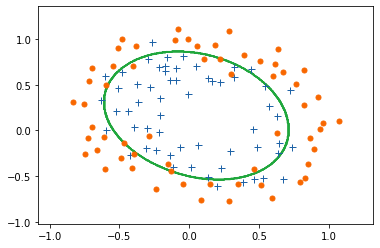

In [22]:
for i in range(m):
        if(y[i] == 0):
            plt.plot(X[i,0],X[i,1], "o", color = '#f86700', markersize = 5) #can also use plt.scatter instead
        else:
            plt.plot(X[i,0],X[i,1],"+", color = '#1f63a7', markersize = 7)

clf = SVC(C = 1, gamma = 0.7, kernel = 'rbf')
clf.fit(X, y.reshape(m))

x1_min, x1_max = X[:, 0].min()-0.25, X[:, 0].max()+0.25
x2_min, x2_max = X[:, 1].min()-0.25, X[:, 1].max()+0.25

xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.005), np.arange(x2_min, x2_max, 0.005))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors = '#1fa73c')
plt.show()